In [359]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statistics
import time

# to ignore the warnings
from warnings import filterwarnings

In [360]:
scores_df = pd.read_excel('./data/game_scores.xlsx')
scores_df.head()

,date,visitor,home,visitor_points,home_points
0,2015-11-25T01:00:00.000Z,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09T23:30:00.000Z,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16T23:00:00.000Z,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19T23:00:00.000Z,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27T00:30:00.000Z,Boston Celtics,Atlanta Hawks,83.0,110.0


In [361]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14242 non-null  object 
 1   visitor         14242 non-null  object 
 2   home            14242 non-null  object 
 3   visitor_points  12781 non-null  float64
 4   home_points     12781 non-null  float64
dtypes: float64(2), object(3)
memory usage: 556.5+ KB


In [362]:
# Find columns and total null values
scores_df.isnull().sum()

date                 0
visitor              0
home                 0
visitor_points    1461
home_points       1461
dtype: int64

In [363]:
# Convert date column to datetime if it's not already
scores_df['date'] = pd.to_datetime(scores_df['date'], errors='coerce')

# Remove the time portion by formatting to only show year-month-day
scores_df['date'] = scores_df['date'].dt.strftime('%Y-%m-%d')

scores_df.dtypes


date               object
visitor            object
home               object
visitor_points    float64
home_points       float64
dtype: object

In [364]:
# Find rows that contain null values
scores_df[scores_df['visitor_points'].isnull()]

,date,visitor,home,visitor_points,home_points
23,2024-11-05,Boston Celtics,Atlanta Hawks,NaN,NaN
46,2024-11-13,Atlanta Hawks,Boston Celtics,NaN,NaN
47,2025-01-19,Atlanta Hawks,Boston Celtics,NaN,NaN
82,2025-03-16,Atlanta Hawks,Brooklyn Nets,NaN,NaN
83,2025-04-10,Atlanta Hawks,Brooklyn Nets,NaN,NaN
...,...,...,...,...,...
14210,NaN,Toronto Raptors,Washington Wizards,NaN,NaN
14220,2025-01-30,Toronto Raptors,Washington Wizards,NaN,NaN
14221,2025-03-24,Toronto Raptors,Washington Wizards,NaN,NaN
14231,2025-03-06,Utah Jazz,Washington Wizards,NaN,NaN


In [365]:
# Drop all rows that have no points for either team
df = scores_df.dropna()

# Display
df.isnull().sum()

date              0
visitor           0
home              0
visitor_points    0
home_points       0
dtype: int64

# Betting Analysis

Enter the away team:  Indiana Pacers
Enter the home team:  Dallas Mavericks
Enter the first line for the over/under bet:  229.5


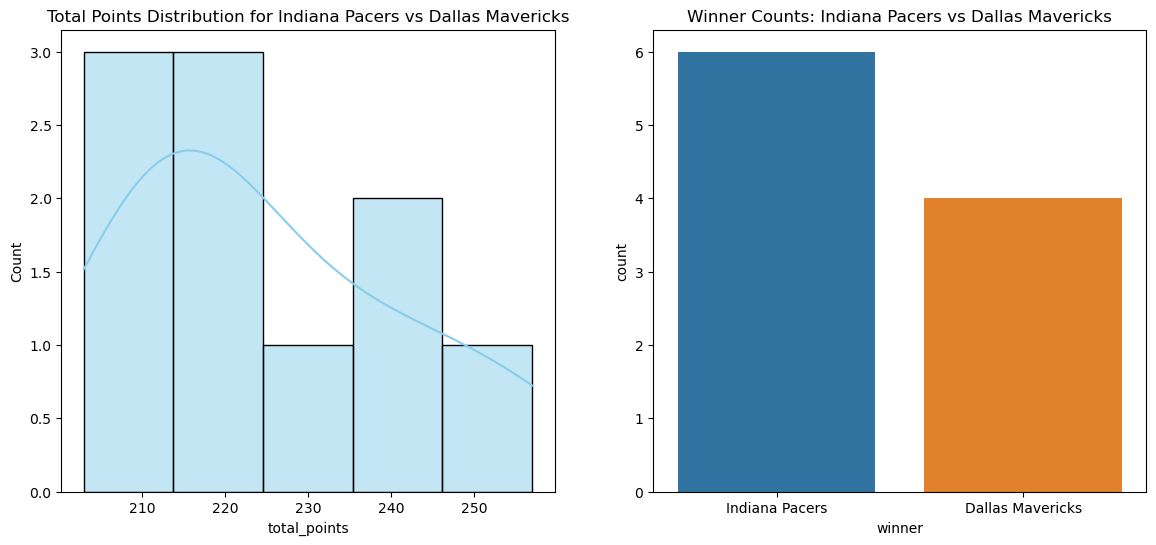

Statistics of Indiana Pacers vs Dallas Mavericks


Mean: 224.7
Standard Deviation: 17.237233601196632
------------------------------------
z-score for 229.5: 0.28
z-score for 230.5: 0.34
z-score for 231.5: 0.39
z-score for 232.5: 0.45
z-score for 233.5: 0.51
z-score for 234.5: 0.57
z-score for 235.5: 0.63
z-score for 236.5: 0.68
z-score for 237.5: 0.74
z-score for 238.5: 0.80
z-score for 239.5: 0.86
z-score for 240.5: 0.92
z-score for 241.5: 0.97
z-score for 242.5: 1.03
z-score for 243.5: 1.09


,date,visitor,home,visitor_points,home_points,total_points,winner
5178,2016-03-12,Indiana Pacers,Dallas Mavericks,112.0,105.0,217.0,Indiana Pacers
5179,2016-12-10,Indiana Pacers,Dallas Mavericks,103.0,111.0,214.0,Dallas Mavericks
5180,2018-02-27,Indiana Pacers,Dallas Mavericks,103.0,109.0,212.0,Dallas Mavericks
5181,2019-02-28,Indiana Pacers,Dallas Mavericks,101.0,110.0,211.0,Dallas Mavericks
5182,2020-03-08,Indiana Pacers,Dallas Mavericks,112.0,109.0,221.0,Indiana Pacers
5183,2020-07-26,Indiana Pacers,Dallas Mavericks,118.0,111.0,229.0,Indiana Pacers
5184,2021-03-27,Indiana Pacers,Dallas Mavericks,109.0,94.0,203.0,Indiana Pacers
5185,2022-01-30,Indiana Pacers,Dallas Mavericks,105.0,132.0,237.0,Dallas Mavericks
5186,2023-03-01,Indiana Pacers,Dallas Mavericks,124.0,122.0,246.0,Indiana Pacers
5187,2024-03-06,Indiana Pacers,Dallas Mavericks,137.0,120.0,257.0,Indiana Pacers


In [417]:
def possible_outcome(dataframe, away_team, home_team, first_line): 
    # Filter the dataframe for the specific matchup
    matchup_game = dataframe.loc[(dataframe['visitor'] == away_team) & (dataframe['home'] == home_team)].copy()
    
    # Add a 'total_points' column 
    matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']
    
    # Determine the winner
    matchup_game['winner'] = matchup_game.apply(lambda row: home_team if row['home_points'] > row['visitor_points']  else away_team, axis=1)

    matchup_game = matchup_game.sort_values(by='date')
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
      
    # Plot total points distribution with a KDE
    sns.histplot(data=matchup_game, x='total_points', kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Total Points Distribution for {away_team} vs {home_team}')
    
    # Plot the winner count    
    sns.countplot(data=matchup_game, x='winner', ax=axes[1], hue='winner')
    axes[1].set_title(f'Winner Counts: {away_team} vs {home_team}')
        
    # Display the plots
    plt.show()
    
     # Calculate a z-score from a provided mean and standard deviation
    mean = matchup_game['total_points'].mean()
    standard_deviation = matchup_game['total_points'].std()
   
    # Create array of UNDER/OVER values starting with given first line
    under_over_lines = [first_line + i for i in range(15)]
    
    # Display basic statics of team matchup
    print(f'Statistics of {away_team} vs {home_team}')
    print('\n')
    print(f'Mean: {mean}')
    print(f'Standard Deviation: {standard_deviation}')

    print('------------------------------------')
    # Display the z-scores for each line score
    for line in under_over_lines:
        zscore = statistics.NormalDist(mean, standard_deviation).zscore(line)
        print(f'z-score for {line}: {zscore:.2f}')

    # print('------------------------------------')

    # Find percentage of games between specified range
    # total_games = len(matchup_game)
    # games_in_range = matchup_game[(matchup_game['total_points'] >= lower_bound) & (matchup_game['total_points'] <= upper_bound)]
    # percentage = (len(games_in_range) / total_games) * 100
    # print(f"Percentage of games with total scores between {lower_bound} and {upper_bound}: {percentage:.2f}%")
    # print('------------------------------------')
    
    return matchup_game

away_team = input("Enter the away team: ")
home_team = input("Enter the home team: ")
first_line = float(input("Enter the first line for the over/under bet: "))


possible_outcome(df, away_team, home_team, first_line)

In [370]:
teams = df['visitor'].unique()
teams

array(['Boston Celtics', 'Atlanta Hawks', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'LA Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'], dtype=object)

# Future Games

In [ ]:
# Get the current date
current_date = dt.date.today()
current_date_string = current_date.strftime("%Y-%m-%d")

# Find games that havent happened yet
future_games = scores_df[(scores_df['date'] >= current_date_string) & (pd.isna(scores_df['visitor_points']))]
future_games = future_games.sort_values(by='date')
future_games.head(20)